In [12]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('notebook')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# 复核

In [13]:
df=pd.read_excel('./gold.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1255 non-null   datetime64[ns]
 1   USD (PM)     1255 non-null   float64       
 2   当日涨跌幅        1254 non-null   float64       
 3   上涨           1254 non-null   float64       
 4   下跌           1254 non-null   float64       
 5   持平           1254 non-null   float64       
 6   昨日价格         1254 non-null   float64       
 7   昨日涨跌幅        1253 non-null   float64       
 8   前5日平均价格      1250 non-null   float64       
 9   前5日平均涨跌幅     1249 non-null   float64       
 10  前20日平均价格     1235 non-null   float64       
 11  前20日平均涨跌幅    1234 non-null   float64       
 12  diff         1255 non-null   float64       
 13  dea          1255 non-null   float64       
 14  bar          1255 non-null   float64       
 15  priceosc     1085 non-null   float64       
 16  mtm   

In [14]:
from tqsdk import ta 
klines=pd.read_excel('./data.xlsx',sheet_name='k_gold').iloc[:,:2].dropna()
result = ta.MA(klines,5)   
df['ma5']=result['ma']
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ma      1251 non-null   float64
dtypes: float64(1)
memory usage: 9.9 KB


In [16]:
for i in [10,20,60,120,250]:
    result = ta.MA(klines,i)   
    df['ma'+str(i)]=result['ma']

In [17]:
 'priceosc      mtm   mtmma        bbi  '.split()

['priceosc', 'mtm', 'mtmma', 'bbi']

In [19]:
result = ta.MA(klines,i)   
for i in range(15,19):
    df.iloc[:,i]=[ta.PRICEOSC(klines,120,5)['priceosc'], ta.MTM(klines,12,5)['mtm'],ta.MTM(klines,12,5)[ 'mtmma'], ta.BBI(klines,3,6,12,24)['bbi']][i-15]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1255 non-null   datetime64[ns]
 1   USD (PM)     1255 non-null   float64       
 2   当日涨跌幅        1254 non-null   float64       
 3   上涨           1254 non-null   float64       
 4   下跌           1254 non-null   float64       
 5   持平           1254 non-null   float64       
 6   昨日价格         1254 non-null   float64       
 7   昨日涨跌幅        1253 non-null   float64       
 8   前5日平均价格      1250 non-null   float64       
 9   前5日平均涨跌幅     1249 non-null   float64       
 10  前20日平均价格     1235 non-null   float64       
 11  前20日平均涨跌幅    1234 non-null   float64       
 12  diff         1255 non-null   float64       
 13  dea          1255 non-null   float64       
 14  bar          1255 non-null   float64       
 15  priceosc     1136 non-null   float64       
 16  mtm   

In [23]:
print(df.isnull().sum().sum())
df.isnull().sum()

1033


Date             0
USD (PM)         0
当日涨跌幅            1
上涨               1
下跌               1
持平               1
昨日价格             1
昨日涨跌幅            2
前5日平均价格          5
前5日平均涨跌幅         6
前20日平均价格        20
前20日平均涨跌幅       21
diff             0
dea              0
bar              0
priceosc       119
mtm             22
mtmma           26
bbi             23
ma5              4
ma10             9
ma20            19
ma60            59
ma120          119
ma250          249
ma1              0
ma2              0
psy             11
psyma           16
BOLL_mid        19
BOLL_top        19
BOLL_bottom     19
bbiboll         23
upr             33
dwn             33
中线bias          21
短线bias          15
roc             12
rocma           17
rsi             11
dpo             40
dbcd            16
mm              20
dtype: int64

In [11]:
df.to_excel('./gold.xlsx',index=False)

# 原文

In [17]:
df=pd.read_excel('./data.xlsx',sheet_name='gold').iloc[:,:2]
df

,Date,USD (PM)
0,2016-09-12,1324.60
1,2016-09-13,1323.65
2,2016-09-14,1321.75
3,2016-09-15,1310.80
4,2016-09-16,1308.35
...,...,...
1260,2021-09-06,1821.60
1261,2021-09-07,1802.15
1262,2021-09-08,1786.00
1263,2021-09-09,1788.25


In [18]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1264
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1255 non-null   datetime64[ns]
 1   USD (PM)  1255 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.4 KB


# 移动平均MA

In [19]:
def ma(n,ls):
    k=0
    new_ls=[]
    for i in range(len(ls)):
        if i+1<n:
            k=np.mean(ls[:i])
        else:
            k=np.mean(ls[i-n:i])
        new_ls.append(k)
    return new_ls

In [20]:
# 分别计算5日、20日、60日的移动平均线
ma_list = [ 5,10,30, 60,120,240]


# 计算简单算术移动平均线MA - 注意：stock_data['close']为股票每天的收盘价
for n in ma_list:
    df['MA_' + str(n)] = ma(n,df.iloc[:,1])

In [21]:
df

,Date,USD (PM),MA_5,MA_10,MA_30,MA_60,MA_120,MA_240
0,2016-09-12,1324.60,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-09-13,1323.65,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000
2,2016-09-14,1321.75,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000
3,2016-09-15,1310.80,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333
4,2016-09-16,1308.35,NaN,1320.200000,1320.200000,1320.200000,1320.200000,1320.200000
...,...,...,...,...,...,...,...,...
1260,2021-09-06,1821.60,1812.280000,1802.620000,1792.106667,1798.397500,1798.875000,1823.929375
1261,2021-09-07,1802.15,1816.900000,1806.875000,1792.840000,1797.406667,1799.691250,1823.563750
1262,2021-09-08,1786.00,1814.360000,1806.890000,1792.905000,1796.349167,1800.250833,1823.131042
1263,2021-09-09,1788.25,1809.200000,1804.645000,1792.426667,1795.030833,1800.720417,1822.766875


<AxesSubplot:>

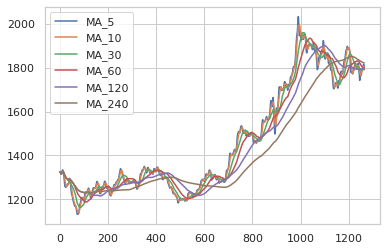

In [22]:
df[['MA_5','MA_10','MA_30','MA_60','MA_120','MA_240']].plot()

# MACD

In [23]:
df['EMA_12']=df.iloc[:,1].ewm(alpha=2 / 13, adjust=False).mean()
df['EMA_26']=df.iloc[:,1].ewm(alpha=2 / 27, adjust=False).mean()
df

,Date,USD (PM),MA_5,MA_10,MA_30,MA_60,MA_120,MA_240,EMA_12,EMA_26
0,2016-09-12,1324.60,NaN,NaN,NaN,NaN,NaN,NaN,1324.600000,1324.600000
1,2016-09-13,1323.65,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000,1324.453846,1324.529630
2,2016-09-14,1321.75,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000,1324.037870,1324.323731
3,2016-09-15,1310.80,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333,1322.001274,1323.321973
4,2016-09-16,1308.35,NaN,1320.200000,1320.200000,1320.200000,1320.200000,1320.200000,1319.901078,1322.212938
...,...,...,...,...,...,...,...,...,...,...
1260,2021-09-06,1821.60,1812.280000,1802.620000,1792.106667,1798.397500,1798.875000,1823.929375,1805.080933,1798.675761
1261,2021-09-07,1802.15,1816.900000,1806.875000,1792.840000,1797.406667,1799.691250,1823.563750,1804.630020,1798.933112
1262,2021-09-08,1786.00,1814.360000,1806.890000,1792.905000,1796.349167,1800.250833,1823.131042,1801.763863,1797.975104
1263,2021-09-09,1788.25,1809.200000,1804.645000,1792.426667,1795.030833,1800.720417,1822.766875,1799.684807,1797.254726


<AxesSubplot:>

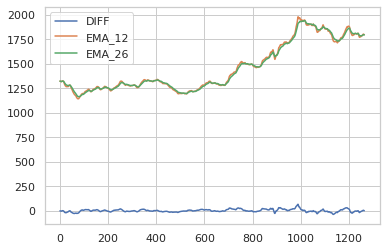

In [24]:
df['DIFF']=df['EMA_12']-df['EMA_26']
df[['DIFF','EMA_12','EMA_26']].plot()

In [25]:
df['DEA'] = df['DIFF'].ewm(alpha=2 / 10, adjust=False).mean()
df['MACD'] = 2 * (df['DIFF'] - df['DEA'])
df

,Date,USD (PM),MA_5,MA_10,MA_30,MA_60,MA_120,MA_240,EMA_12,EMA_26,DIFF,DEA,MACD
0,2016-09-12,1324.60,NaN,NaN,NaN,NaN,NaN,NaN,1324.600000,1324.600000,0.000000,0.000000,0.000000
1,2016-09-13,1323.65,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000,1324.453846,1324.529630,-0.075783,-0.015157,-0.121254
2,2016-09-14,1321.75,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000,1324.037870,1324.323731,-0.285861,-0.069298,-0.433127
3,2016-09-15,1310.80,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333,1322.001274,1323.321973,-1.320699,-0.319578,-2.002242
4,2016-09-16,1308.35,NaN,1320.200000,1320.200000,1320.200000,1320.200000,1320.200000,1319.901078,1322.212938,-2.311860,-0.718034,-3.187651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,2021-09-06,1821.60,1812.280000,1802.620000,1792.106667,1798.397500,1798.875000,1823.929375,1805.080933,1798.675761,6.405172,1.192916,10.424513
1261,2021-09-07,1802.15,1816.900000,1806.875000,1792.840000,1797.406667,1799.691250,1823.563750,1804.630020,1798.933112,5.696908,2.093714,7.206388
1262,2021-09-08,1786.00,1814.360000,1806.890000,1792.905000,1796.349167,1800.250833,1823.131042,1801.763863,1797.975104,3.788759,2.432723,2.712073
1263,2021-09-09,1788.25,1809.200000,1804.645000,1792.426667,1795.030833,1800.720417,1822.766875,1799.684807,1797.254726,2.430082,2.432195,-0.004226


<AxesSubplot:>

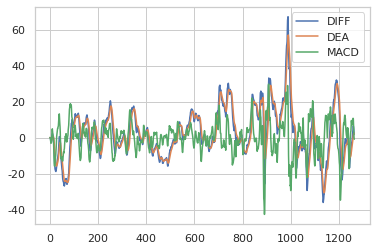

In [26]:
df[['DIFF','DEA','MACD']].plot()

# MTM

In [27]:
price=df.iloc[:,1]

1.MTM=当日收盘价-N日前收盘价

2.MTMMA=MTM的M日移动平均

3.参数N一般设置为12日

参数M一般设置为6

其中：C为当日收市价，Cn为N日前收市价，N为设定参数，一般选设10日，亦可在6日至14日之间选择。

In [28]:
df['MTM']=pd.Series(np.append(np.zeros(12),(price[12:].values-price[:-12].values)))

In [29]:
df['MTMMA']=ma(6,df['MTM'])

# 摆动指数(Oscillator，OSC)

摆动指数(或称震荡量指标)是计算当日收市价与“N”日的平均收市价之比率。震荡量是动量指标的另一表现形式，一般用百分比值来加以计算。其内涵是以当日收盘价除以N日平均收盘价，再乘以100。

计算方法非常简单，公式如下：

OSC=（Ct÷MA）×100

Ct为当日收市价，MA为N日平均收市价。

In [72]:
# df.to_excel('bitcoin(14:53).xlsx')

In [30]:
#N取10，即 MA取10日平均价格
df['OSC']=100*(price/df['MA_10'])
df

,Date,USD (PM),MA_5,MA_10,MA_30,MA_60,MA_120,MA_240,EMA_12,EMA_26,DIFF,DEA,MACD,MTM,MTMMA,OSC
0,2016-09-12,1324.60,NaN,NaN,NaN,NaN,NaN,NaN,1324.600000,1324.600000,0.000000,0.000000,0.000000,0.0,NaN,NaN
1,2016-09-13,1323.65,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000,1324.453846,1324.529630,-0.075783,-0.015157,-0.121254,0.0,0.00,99.928280
2,2016-09-14,1321.75,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000,1324.037870,1324.323731,-0.285861,-0.069298,-0.433127,0.0,0.00,99.820636
3,2016-09-15,1310.80,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333,1322.001274,1323.321973,-1.320699,-0.319578,-2.002242,0.0,0.00,99.052897
4,2016-09-16,1308.35,NaN,1320.200000,1320.200000,1320.200000,1320.200000,1320.200000,1319.901078,1322.212938,-2.311860,-0.718034,-3.187651,0.0,0.00,99.102409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,2021-09-06,1821.60,1812.280000,1802.620000,1792.106667,1798.397500,1798.875000,1823.929375,1805.080933,1798.675761,6.405172,1.192916,10.424513,NaN,-13.85,101.052912
1261,2021-09-07,1802.15,1816.900000,1806.875000,1792.840000,1797.406667,1799.691250,1823.563750,1804.630020,1798.933112,5.696908,2.093714,7.206388,NaN,NaN,99.738499
1262,2021-09-08,1786.00,1814.360000,1806.890000,1792.905000,1796.349167,1800.250833,1823.131042,1801.763863,1797.975104,3.788759,2.432723,2.712073,NaN,NaN,98.843870
1263,2021-09-09,1788.25,1809.200000,1804.645000,1792.426667,1795.030833,1800.720417,1822.766875,1799.684807,1797.254726,2.430082,2.432195,-0.004226,NaN,NaN,99.091511


# 佳庆离散指标（Chaikin Volatility，简称CVLT）

佳庆离散指标（Chaikin Volatility，简称CVLT，VCI，CV）又称“佳庆变异率指数”，是通过测量一段时间内价格幅度平均值的变化来反映价格的离散程度。

佳庆离散指标由马可·蔡金（Marc Chaikin）提出，它的计算方法和离散比率（VLT）很相似，但佳庆离散指标中没有考虑跳空缺口的作用。Chaikin Volatility指针同时配合移动平均线（简单移动平均线、EMA、WMA）和Envelopes使用会效果更佳。

1、先计算n日的Range = High - Low=价差指数平滑移动平均：
REMAt = REMAt-1 + 2/(n+1) * ( Rt - REMAt-1)

2、计算n日移动平均的变动率：

Chainkin's Volatility = (REMAt - REMAt-n)/REMAt-n


价差指数平滑移动平均是将一段时间最高价与最低价之差进行指数平滑移动平均（EMA）所得出的数值。
描述价格的波动程度的状况有二种，一种是认为当股价向上时的波动程度将随之上升，此种描述是认为价格上升时经常伴随着成交量放大，这表示此 过程将吸引更多的市场参与者加入，而更多人的参与交易隐含着波动程度放大。另一种状况则是认为观察短期的价格走势，则波动的讯杂干扰会较长期来得大。

In [74]:
pip install Ta-Lib

     |████████████████████████████████| 269 kB 775 kB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/luozeming/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/qs/r2rs9bds6fv8stb6zxxvs4vm0000gn/T/pip-install-xutb0l0u/ta-lib_8da48913687e4775a7f5f4833b50ceb5/setup.py'"'"'; __file__='"'"'/private/var/folders/qs/r2rs9bds6fv8stb6zxxvs4vm0000gn/T/pip-install-xutb0l0u/ta-lib_8da48913687e4775a7f5f4833b50ceb5/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/qs/r2rs9bds6fv8stb6zxxvs4vm0000gn/T/pip-wheel-kgww578w
       cwd: /private/var/folders/qs/r2rs9bds6fv8stb6zxxvs4vm0000gn/T/pip-install-xutb0l0u/ta-lib_8da48913687e4775a7f5f4833b50ceb5/
 

In [76]:
import talib

ModuleNotFoundError: No module named 'talib'

In [77]:
pip install tqsdk -U

     |████████████████████████████████| 1.9 MB 768 kB/s eta 0:00:01
     |████████████████████████████████| 96 kB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 9.4 MB/s  eta 0:00:01
     |████████████████████████████████| 574 kB 27.9 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 30.3 MB/s eta 0:00:01
     |████████████████████████████████| 202 kB 31.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
from tqsdk.ta import MACD

# klines = api.get_kline_serial("SHFE.cu1812", 60)   # 提取SHFE.cu1812的分钟线
klines=pd.read_excel('./data.xlsx',sheet_name='k_gold').iloc[:,:2].dropna()
result = MACD(klines, 12, 26, 9)                        # 计算MACD指标
print(result["diff"])       

0       0.000000
1      -0.075783
2      -0.285861
3      -1.320699
4      -2.311860
          ...   
1260    6.405172
1261    5.696908
1262    3.788759
1263    2.430082
1264    1.844450
Name: diff, Length: 1255, dtype: float64


In [33]:
df['DIFF']

0       0.000000
1      -0.075783
2      -0.285861
3      -1.320699
4      -2.311860
          ...   
1260    6.405172
1261    5.696908
1262    3.788759
1263    2.430082
1264    1.844450
Name: DIFF, Length: 1255, dtype: float64

# TRMA(df, n)
三角移动平均线

In [34]:
from tqsdk import ta 
result = ta.TRMA(klines, 12)   
result

,trma
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1250,1801.479762
1251,1804.808333
1252,1807.058333
1253,1807.895238


# 压力支撑指标

## BOLL(df, n, p)
布林线

布林线（Boll）指标是股市技术分析的常用工具之一，通过计算股价的“标准差”，再求股价的“信赖区间”。
该指标在图形上画出三条线，其中上下两条线可以分别看成是股价的压力线和支撑线，而在两条线之间还有一条股价平均线，布林线指标的参数最好设为20。一般来说，股价会运行在压力线和支撑线所形成的通道中。
与MACD、RSI、KDJ等指标一样，BOLL指标也是股票市场最实用的技术分析参考指标。

BOLL指标的计算公式

中轨线=N日的移动平均线
上轨线=中轨线+两倍的标准差
下轨线=中轨线－两倍的标准差


BOLL指标的计算过程
- 1）计算MA
    - MA=N日内的收盘价之和÷N
- 2）计算标准差MD
    - MD=平方根N日的（C－MA）的两次方之和除以N
- 3）计算MB、UP、DN线
    - MB=N日的MA
    - UP=MB+2×MD
    - DN=MB－2×MD

各大股票交易软件默认N是20，所以MB等于当日20日均线值

Args:
df (pandas.DataFrame): Dataframe格式的K线序列

n (int): 周期n

p (int): 计算参数p

Returns:
pandas.DataFrame: 返回的dataframe包含3列, 分别是"mid", "top"和"bottom", 分别代表布林线的中、上、下轨

In [35]:
df['BOLL_mid']=ta.BOLL(klines,20,2).iloc[:,0]
df['BOLL_top']=ta.BOLL(klines,20,2).iloc[:,1]
df['BOLL_bottom']=ta.BOLL(klines,20,2).iloc[:,2]

In [124]:
ta.BOLL(klines,20,2)
#p含义为上中、下中之间距离几倍标准差

,mid,top,bottom
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1821,48394.7485,48394.7485,48394.7485
1822,48796.1900,48796.1900,48796.1900
1823,48897.7555,48897.7555,48897.7555
1824,48864.9420,48864.9420,48864.9420


## BBIBOLL(df, n, m)
多空布林线

多空布林线（BBIBOLL）是以多空线为中心线，多空线的标准差为带宽的轨道线。UPR线为压力线，对股价有压制作用，DWN线为支撑线，对股价具有支撑作用，BBIBOLL线为中轴线。

Args:
df (pandas.DataFrame): Dataframe格式的K线序列

n (int): 参数n

m (int): 参数m

Returns:
pandas.DataFrame: 返回的DataFrame包含3列, 是"bbiboll", "upr", "dwn", 分别代表多空布林线, 压力线和支撑线

- 1.BBIBOLL=（3日简单移动平均价+6日简单移动平均价+12日简单移动平均价+24日简单移动平均价)/4
 - 2.UPR=BBIBOLL+M*BBIBOLL的N日估算标准差
 - 3.DWN=BBIBOLL-M*BBIBOLL的N日估算标准差
- 4.参数N=11，M=6

In [36]:
ta.BBIBOLL(klines,11,6)
#N日估算标准差
#M含义为上中、下中之间距离几倍标准差

,bbiboll,upr,dwn
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1260,1806.000521,1856.294137,1755.706904
1261,1805.595313,1854.362128,1756.828497
1262,1800.947396,1844.181131,1757.713661
1263,1796.770313,1835.482799,1758.057826


In [37]:
df=pd.concat([df,ta.BBIBOLL(klines,11,6)],axis=1)

df

,Date,USD (PM),MA_5,MA_10,MA_30,MA_60,MA_120,MA_240,EMA_12,EMA_26,...,MACD,MTM,MTMMA,OSC,BOLL_mid,BOLL_top,BOLL_bottom,bbiboll,upr,dwn
0,2016-09-12,1324.60,NaN,NaN,NaN,NaN,NaN,NaN,1324.600000,1324.600000,...,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-09-13,1323.65,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000,1324.600000,1324.453846,1324.529630,...,-0.121254,0.0,0.00,99.928280,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-09-14,1321.75,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000,1324.125000,1324.037870,1324.323731,...,-0.433127,0.0,0.00,99.820636,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-09-15,1310.80,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333,1323.333333,1322.001274,1323.321973,...,-2.002242,0.0,0.00,99.052897,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-09-16,1308.35,NaN,1320.200000,1320.200000,1320.200000,1320.200000,1320.200000,1319.901078,1322.212938,...,-3.187651,0.0,0.00,99.102409,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,2021-09-06,1821.60,1812.280000,1802.620000,1792.106667,1798.397500,1798.875000,1823.929375,1805.080933,1798.675761,...,10.424513,NaN,-13.85,101.052912,1785.8075,1842.895791,1728.719209,1806.000521,1856.294137,1755.706904
1261,2021-09-07,1802.15,1816.900000,1806.875000,1792.840000,1797.406667,1799.691250,1823.563750,1804.630020,1798.933112,...,7.206388,NaN,NaN,99.738499,1788.9725,1841.971651,1735.973349,1805.595313,1854.362128,1756.828497
1262,2021-09-08,1786.00,1814.360000,1806.890000,1792.905000,1796.349167,1800.250833,1823.131042,1801.763863,1797.975104,...,2.712073,NaN,NaN,98.843870,1792.1050,1835.265885,1748.944115,1800.947396,1844.181131,1757.713661
1263,2021-09-09,1788.25,1809.200000,1804.645000,1792.426667,1795.030833,1800.720417,1822.766875,1799.684807,1797.254726,...,-0.004226,NaN,NaN,99.091511,1794.3375,1831.075661,1757.599339,1796.770313,1835.482799,1758.057826


MIKE(df, n)
麦克指标

In [39]:
ta.MIKE(klines,12)

KeyError: 'high'

CDP(df, n)
逆势操作

In [40]:
ta.CDP(klines,12)

KeyError: 'high'

# 反趋向指标

## BIAS

乖离率(BIAS)，又称偏离率，简称Y值，是通过计算市场指数或收盘价与某条移动平均线之间的差距百分比，以反映一定时期内价格与其MA偏离程度的指标，从而得出价格在剧烈波动时因偏离移动平均趋势而造成回档或反弹的可能性，以及价格在正常波动范围内移动而形成继续原有势的可信度。乖离率，是用百分比来表示价格与MA间的偏离程度(差距率)。乖离率曲线(BIAS)，是将各BIAS值连成线，得到的一条以0值为横向中轴之波动伸延的曲线。

乖离率=[(当日收盘价-N日平均价)/N日平均价]*100%

其中N，一般5、6、10、12、24、30和72。在实际运用中，短线使用6日乖离率较为有效，中线则放大为10日或12日。

1．BIAS=(收盘价-收盘价的N日简单平均)/收盘价的N日简单平均*100

2．BIAS指标有三条指标线，N的参数一般设置为6日、12日、24日。

注意：为了指标在大周期（例如，38，57，137，254，526等）运用中更加直观，更加准确把握中期波动，可以将公式进化：

BIAS=(EMA(收盘价，N)-MA(收盘价,M))/MA(收盘价，M)*100;

其中，N取超短周期，例如4，7，9，12等；M为大周期，例如，38，57，137，254，526等；

乖离率

Args:
df (pandas.DataFrame): Dataframe格式的K线序列

n (int): 移动平均的计算周期

Returns:
pandas.DataFrame: 返回的DataFrame包含1列, 是"bias", 代表计算出来的乖离率值





Args:
df (pandas.DataFrame): Dataframe格式的K线序列

n (int): 移动平均的计算周期



In [41]:
from tqsdk.ta import BIAS
result = BIAS(klines, 12)# 中线则放大为10日或12日
result = BIAS(klines, 6)# 短线使用6日乖离率较为有效
result

,bias
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1250,0.428191
1251,-0.677435
1252,-1.305974
1253,-0.966841


In [42]:
df['中线bias']=BIAS(klines, 12)
df['短线bias']=BIAS(klines, 6)

CCI(df, n)
顺势指标

In [98]:
ta.CCI(klines,10)

KeyError: 'high'

In [99]:
ta.KDJ(klines,5,5,5)

KeyError: 'high'

In [100]:
ta.WR(klines,10)

KeyError: 'high'

In [102]:
ta.LWR(klines,10,9)

KeyError: 'high'

## ROC(df, n, m)
变动速率

Args:
df (pandas.DataFrame): Dataframe格式的K线序列

n (int): 参数n

m (int): 周期m

Returns:
pandas.DataFrame: 返回的DataFrame包含2列, 是"roc", "rocma", 分别代表ROC值和ROC的简单移动平均值Args:
df (pandas.DataFrame): Dataframe格式的K线序列

n (int): 参数n

m (int): 周期m

Returns:
pandas.DataFrame: 返回的DataFrame包含2列, 是<b>"roc", "rocma", 分别代表ROC值和ROC的简单移动平均值</b>

1、AX=今日收盘价-N日前收盘价

2、BX=N日前收盘价

3、ROC=AX/BX

4、MAROC=ROC的M日移动平均线

5、常规参数设置，N为12天，M为6天

在实盘操作中,ROC指标既可以帮助我们有效地识别出趋势的运行状态,又可以帮助我们进行短线的高抛低吸操作。

In [128]:
ta.ROC(klines,12,6)
#"roc", "rocma", 分别代表ROC值和ROC的简单移动平均值

,roc,rocma
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1821,8.429187,1.912200
1822,7.566167,3.023011
1823,-0.327131,3.125598
1824,-6.071485,1.978466


In [43]:
df=pd.concat([df,ta.ROC(klines,12,6)],axis=1)

## RSI(df, n)
相对强弱指标

RSI（n)=A/（A+B）×100%

其中A表示n天中股价向上波动的幅度大小，而B则表示n天中股价向下波动的大小。A+B表示股价在此期间总的波动幅度大小。

RSI的变动范围在0—100之间，强弱指标值一般分布在20—80。

80-100 极强 卖出

50-80 强 买入

20-50 弱 观望

0-20 极弱 买入

这里的“极强”、“强”、“弱”、“极弱”只是一个相对的分析概念。

至一用多少日的RSI才合适。最初RSI指标提出来时是用14天，14天作为参数则成为默定值。但在实际操作中，分析者常觉得14天太长了一点，才有5天和9天之方法。

长短期交叉情况

短期RSI是指参数相对小的RSI，长期RSI是指参数相对较长的RSI。

比如，6日RSI和12日RSI中 ，6日RSI即为短期RSI，12日RSI即为长期RSI。长短期RSI线的交叉情况可以作为我们研判行情的方法。

In [105]:
ta.RSI(klines,10)

,rsi
0,NaN
1,0.000000
2,1.146053
3,1.122049
4,2.802388
...,...
1821,69.078609
1822,71.894272
1823,43.476401
1824,41.221812


In [44]:
df['rsi']=ta.RSI(klines,10)

In [107]:
ta.SLOWKD(klines,10,1,2,3)

KeyError: 'low'

## DPO(df)
区间震荡线

1.DPO=收盘价-前(N/2+1)日简单移动平均

2.MADPO=DPO的M日简单移动平均

2.参数N设置为20，参数M设置为6

区间震荡线（DPO），是由沃尔特·巴塞特(Walt Bressert)提出的。是一个排除价格趋势的震荡指标。它试图通过扣除前期移动平均价来消除长期趋势对价格波动的干扰，从而便于发现价格短期的波动和超买超卖水平。

In [108]:
ta.DPO(klines)

,dpo
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1821,5207.6040
1822,5909.1015
1823,-180.2650
1824,-1165.1305


In [45]:
df['dpo']=ta.DPO(klines)

## DBCD(df, n, m, t)
异同离差乖离率

Args:
df (pandas.DataFrame): Dataframe格式的K线序列

n (int): 周期n

m (int): 参数m

t (int): 参数t

Returns:
pandas.DataFrame: 返回的DataFrame包含2列, 是"dbcd", "mm", 分别代表离差值及其简单移动平均值

先计算乖离率BIAS，然后计算不同日的乖离率之间的离差，最后对离差进行指数移动平滑处理。

In [132]:
ta.DBCD(klines,12,5,3)#不知道参数咋给，随便吧

,dbcd,mm
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1821,0.039155,0.001979
1822,0.046674,0.016036
1823,0.009047,0.021197
1824,-0.023850,0.017361


In [48]:
df=pd.concat([df,ta.DBCD(klines,12,5,3)],axis=1)

# 能量指标

## PSY(df, n, m)
心理线

心理线（PSY）指标是研究投资者对股市涨跌产生心理波动的情绪指标。它对股市短期走势的研判具有一定的参考意义。

心理线（PSY）指标将一定时期内投资者趋向买方或卖方的心理事实转化为数值，从而判断股价的未来趋势。

1.PSY=(N日内上涨天数/N)*100

2.PSYMA=PSY的M日简单移动平均

3.参数N设置为12日，参数M设置为6日

In [119]:
ta.VR(klines,10)

KeyError: 'volume'

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1264
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1255 non-null   datetime64[ns]
 1   USD (PM)     1255 non-null   float64       
 2   MA_5         1253 non-null   float64       
 3   MA_10        1253 non-null   float64       
 4   MA_30        1253 non-null   float64       
 5   MA_60        1253 non-null   float64       
 6   MA_120       1253 non-null   float64       
 7   MA_240       1253 non-null   float64       
 8   EMA_12       1255 non-null   float64       
 9   EMA_26       1255 non-null   float64       
 10  DIFF         1255 non-null   float64       
 11  DEA          1255 non-null   float64       
 12  MACD         1255 non-null   float64       
 13  MTM          1245 non-null   float64       
 14  MTMMA        1249 non-null   float64       
 15  OSC          1253 non-null   float64       
 16  BOLL_m

In [50]:
df.to_excel('gold(压力支撑_反趋向).xlsx',index=False)